In [3]:
input_path = r"../data/input/shopping_behavior_updated.csv"

In [4]:
import pandas as pd

df = pd.read_csv(input_path)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [21]:
age_brackets = {f"{i}_{i+4}": i+4 for i in range(0, 100, 5)}
print(age_brackets)

{'0_4': 4, '5_9': 9, '10_14': 14, '15_19': 19, '20_24': 24, '25_29': 29, '30_34': 34, '35_39': 39, '40_44': 44, '45_49': 49, '50_54': 54, '55_59': 59, '60_64': 64, '65_69': 69, '70_74': 74, '75_79': 79, '80_84': 84, '85_89': 89, '90_94': 94, '95_99': 99}


In [22]:
results = []
for age_key in age_brackets:
    lower, upper = map(int, age_key.split('_'))
    mask = (df['Age'] >= lower) & (df['Age'] < upper)
    male_count = (mask & (df['Gender'] == 'Male')).sum()
    female_count = (mask & (df['Gender'] == 'Female')).sum()
    results.append({'age': age_key, 'male': male_count, 'female': female_count})

pyramid_df = pd.DataFrame(results)
pyramid_df

,age,male,female
0,0_4,0,0
1,5_9,0,0
2,10_14,0,0
3,15_19,49,20
4,20_24,184,84
5,25_29,216,100
6,30_34,199,96
7,35_39,203,90
8,40_44,224,93
9,45_49,172,115


In [26]:
pyramid_df['male'] = pyramid_df['male'] / -1
pyramid_df['female'] = pyramid_df['female'] / 1

In [27]:
ages = list(age_brackets.keys())

/tmp/ipykernel_49624/1949730582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='male', y='age', data=pyramid_df, order=ages, palette="Blues")
/tmp/ipykernel_49624/1949730582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='female', y='age', data=pyramid_df, order=ages, palette="Greens")


([<matplotlib.axis.XTick at 0x7f4a4a5ae2c0>,
 [Text(-500, 0, '500'),
  Text(-250, 0, '250'),
  Text(0, 0, '0'),
  Text(250, 0, '250'),
  Text(500, 0, '500')])

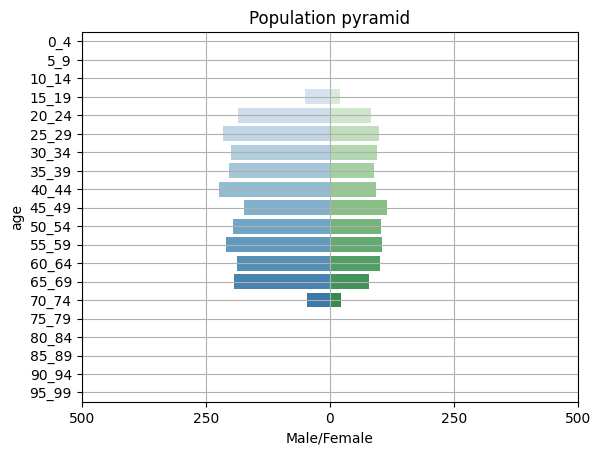

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.barplot(x='male', y='age', data=pyramid_df, order=ages, palette="Blues")
ax2 = sns.barplot(x='female', y='age', data=pyramid_df, order=ages, palette="Greens")
plt.title("Population pyramid")
plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[-500, -250, 0, 250, 500],
labels=['500', '250', '0', '250', '500'])